In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pylab import rcParams

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [14]:
# with a 70 - 30 split

In [3]:
data= pd.read_csv('Test Drive/Folds-one sheet.csv')
num_rows= data.shape[0]
print ('Number of rows=', num_rows)

Number of rows= 47840


In [4]:
counter_nan= data.isnull().sum()
counter_without_nan= counter_nan[counter_nan==0]
data= data[counter_without_nan.keys()]

In [5]:
data.columns= ['Avg_Temp', 'Vacuum', 'Avg_Pressure', 'Humidity', 'Output']
data.head()

,Avg_Temp,Vacuum,Avg_Pressure,Humidity,Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [6]:
data.describe()

,Avg_Temp,Vacuum,Avg_Pressure,Humidity,Output
count,47840.000000,47840.000000,47840.000000,47840.000000,47840.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452162,12.707362,5.938535,14.599658,17.066281
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


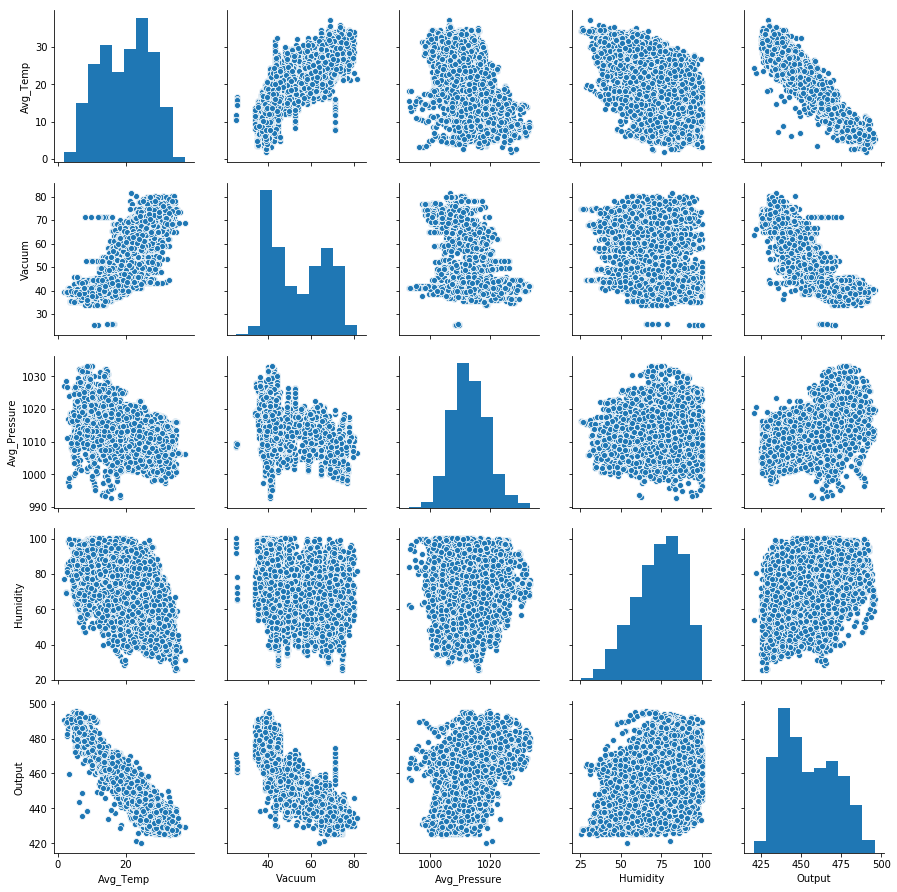

In [7]:
sb.pairplot(data)

In [8]:
print (data.corr())

              Avg_Temp    Vacuum  Avg_Pressure  Humidity    Output
Avg_Temp      1.000000  0.844107     -0.507549 -0.542535 -0.948128
Vacuum        0.844107  1.000000     -0.413502 -0.312187 -0.869780
Avg_Pressure -0.507549 -0.413502      1.000000  0.099574  0.518429
Humidity     -0.542535 -0.312187      0.099574  1.000000  0.389794
Output       -0.948128 -0.869780      0.518429  0.389794  1.000000


In [9]:
X = data['Avg_Temp'].values.reshape(-1,1)
y = data['Output'].values.reshape(-1,1)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [11]:
reg= LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred = reg.predict(X_test)
findings = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
print(findings)

       Actual   Predicted
0      436.29  432.521137
1      438.08  446.499785
2      476.12  472.217889
3      485.78  487.327004
4      436.08  436.260371
5      449.88  451.478184
6      485.57  481.348577
7      470.67  470.739587
8      453.47  452.412992
9      430.50  433.195068
10     444.99  445.564976
11     460.41  463.391558
12     439.16  444.347551
13     445.54  448.825936
14     438.05  433.542904
15     436.33  439.064796
16     477.91  476.826713
17     437.93  434.542932
18     455.75  456.608761
19     441.78  446.043251
20     468.55  470.413491
21     438.41  431.455890
22     445.07  451.412965
23     438.09  430.803698
24     470.03  465.065517
25     445.33  448.043306
26     474.35  470.804807
27     436.53  435.912535
28     472.47  470.391752
29     438.43  430.999355
...       ...         ...
14322  462.50  461.521941
14323  454.50  453.586938
14324  469.60  466.891655
14325  462.84  462.935023
14326  452.94  450.804252
14327  483.04  481.457276
14328  458.5

In [13]:
print('R2 Score:', metrics.r2_score(y_test, y_pred)) 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 Score: 0.8998718241670499
Mean Absolute Error: 4.258097533258372
Mean Squared Error: 29.025767812731218
Root Mean Squared Error: 5.387556757263093
